# Modelling of Tweets Classification

### This is the notebook for lyrics classification using BERT.

* Author: Alperen Demirci, Bora Dere

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [19]:
train_data = pandas.read_csv('../data/train_musics_features.csv')
test_data = pandas.read_csv('../data/val_musics_features.csv')

In [20]:
train_data

,artist,type,title,user_id,src,disorder,lyric_length,unique_user_count
0,yg,T,toot it and boot it,7f20349dc1,SPOTIFY,5,2584,23
1,hailee steinfeld,P,love myself,3324437f73,SPOTIFY,4,2408,48
2,super furry animals,P,zoom!,8222eada89,SPOTIFY,2,957,133
3,the maine,A,slip the noose (orchestral),d9d9416fb0,SPOTIFY,1,1794,436
4,girl in red,P,girls,48e275ed8e,SPOTIFY,4,1178,48
...,...,...,...,...,...,...,...,...
2612,the killers,T,mr. brightside,d066bd53a8,SPOTIFY,0,1546,772
2613,andrew bird,A,andalucia,6b17239a5b,SPOTIFY,1,647,436
2614,neil diamond,A,"cherry, cherry",07a651a06f,APPLE,3,1160,245
2615,solange,A,"interlude: i got so much magic, you can have i...",94a96931df,APPLE,2,307,133


In [21]:
## calcualte the correlation 

train_data.src.value_counts()

src
SPOTIFY       2053
APPLE          505
SOUNDCLOUD      59
Name: count, dtype: int64

In [22]:
maps_src = {
    "SPOTIFY": 0,
    "APPLE": 1,
    "SOUNDCLOUD": 2
}

train_data['src'] = train_data['src'].map(maps_src)

temp_df = train_data[['src', 'disorder']]

## check the correlatin between src and disorder

temp_df

temp_df.describe()

,src,disorder
count,2617.000000,2617.000000
mean,0.238059,2.292702
std,0.475987,1.775189
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,4.000000
max,2.000000,5.000000


In [24]:
temp_df.corr()

,src,disorder
src,1.000000,-0.163024
disorder,-0.163024,1.000000


In [ ]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, use_label_encoder=False)

xgb_model.fit(train_data.drop(columns=['label']), train_data['label'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [8]:
# Predict the labels of the test set

predictions = xgb_model.predict(test_data.drop(columns=['label']))

# Calculate the accuracy of the model

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.26717557251908397


In [9]:
from sklearn.metrics import classification_report

print(classification_report(test_data['label'], predictions))



              precision    recall  f1-score   support

           0       0.28      0.58      0.38       155
           1       0.21      0.09      0.13       100
           2       0.21      0.12      0.15       100
           3       0.20      0.17      0.18       100
           4       0.25      0.18      0.21       100
           5       0.36      0.29      0.32       100

    accuracy                           0.27       655
   macro avg       0.25      0.24      0.23       655
weighted avg       0.25      0.27      0.24       655



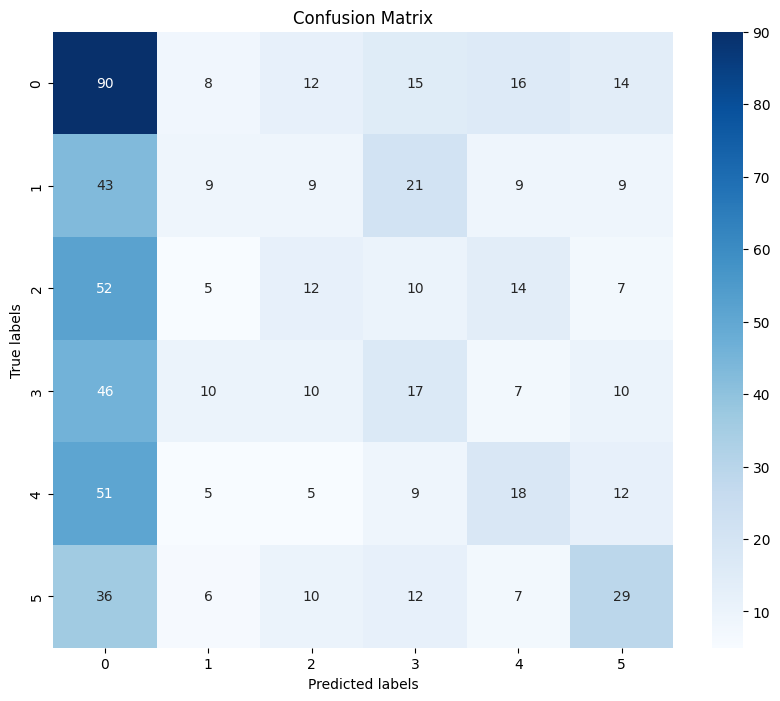

In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(train_data.drop(columns=['label']), train_data['label'])

predictions = nb_model.predict(test_data.drop(columns=['label']))

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.20305343511450383


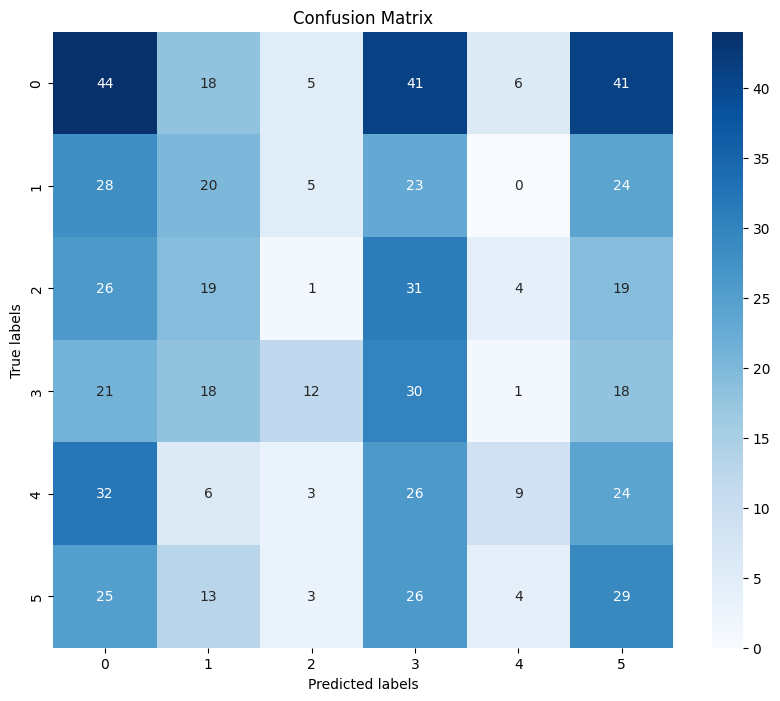

In [15]:
classification_report(test_data['label'], predictions)

conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.title('Confusion Matrix')

plt.show()


In [17]:
print(classification_report(test_data['label'], predictions))

              precision    recall  f1-score   support

           0       0.25      0.28      0.27       155
           1       0.21      0.20      0.21       100
           2       0.03      0.01      0.02       100
           3       0.17      0.30      0.22       100
           4       0.38      0.09      0.15       100
           5       0.19      0.29      0.23       100

    accuracy                           0.20       655
   macro avg       0.20      0.20      0.18       655
weighted avg       0.21      0.20      0.19       655



# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(train_data.drop(columns=['label']), train_data['label'])

predictions = rf_model.predict(test_data.drop(columns=['label']))

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.2595419847328244


In [20]:
print(classification_report(test_data['label'], predictions))

              precision    recall  f1-score   support

           0       0.28      0.63      0.39       155
           1       0.22      0.13      0.16       100
           2       0.16      0.12      0.14       100
           3       0.14      0.08      0.10       100
           4       0.22      0.14      0.17       100
           5       0.45      0.25      0.32       100

    accuracy                           0.26       655
   macro avg       0.25      0.23      0.21       655
weighted avg       0.25      0.26      0.23       655



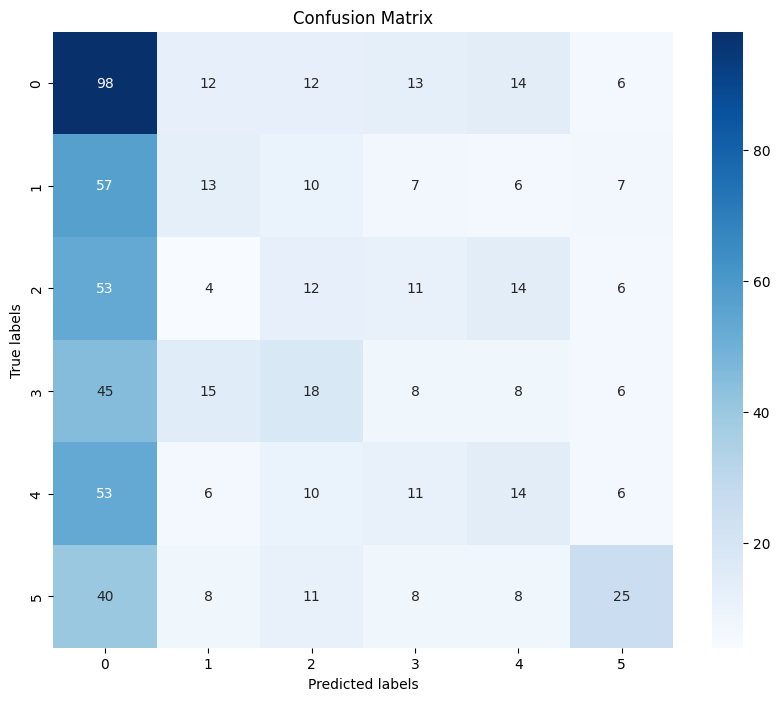

In [21]:
conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

# NN

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50), activation='relu')

mlp_model.fit(train_data.drop(columns=['label']), train_data['label'])


predictions = mlp_model.predict(test_data.drop(columns=['label']))

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')


Accuracy: 0.23969465648854962


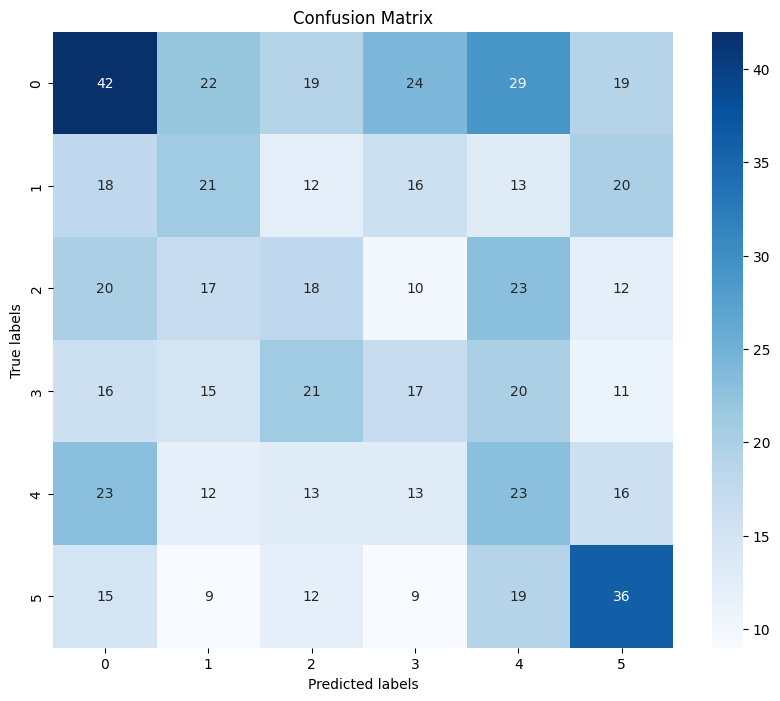

              precision    recall  f1-score   support

           0       0.31      0.27      0.29       155
           1       0.22      0.21      0.21       100
           2       0.19      0.18      0.18       100
           3       0.19      0.17      0.18       100
           4       0.18      0.23      0.20       100
           5       0.32      0.36      0.34       100

    accuracy                           0.24       655
   macro avg       0.23      0.24      0.23       655
weighted avg       0.24      0.24      0.24       655



In [23]:
classification_report(test_data['label'], predictions)

conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')

plt.ylabel('True labels')

plt.title('Confusion Matrix')

plt.show()

print(classification_report(test_data['label'], predictions))